<a href="https://colab.research.google.com/github/ajaythakur3369/The-Sparks-Foundation-Internship/blob/main/Supervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Supervised Classification**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - The Sparks Foundation**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/The-Sparks-Foundation-Internship)**

# **Problem Statement -**

**Objective -** Predict the percentage of a student based on the number of study hours.

This is a simple linear regression task as it involves just 2 variables.

You can use R, Python, SAS, or any other tool.

What will be the predicted score if a student studies for 9.25 hours per day?

# **General Guidelines -**

Task submission:

1. Host the code on a GitHub Repository (public), record the code and output in a video, and post the video on YouTube.

2. Share the links of the code (GitHub) and video (YouTube) as a post on your LinkedIn profile, not TSF Network.

3. Submit the LinkedIn link in the Task Submission Form when shared.


# **Let's Begin !**

### **Import Libraries**

In [ ]:
# Imported all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libraries for training and testing data
from sklearn.model_selection import train_test_split

# Import a library for the model training algorithm
from sklearn.linear_model import LinearRegression

# Import a library for model evaluation
from sklearn import metrics

### **Reading the dataset**

In [ ]:
# Access the Drive from Colab to access the required file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/The_Sparks_Foundation/File_Name/Scores_dataset.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Check the shape of the dataset
data.shape

(25, 2)

### **Calculating all the constraints**

In [ ]:
data.describe(include = [object, np.number])

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Displaying all the columns and their data types**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Checking if there are any null values**

In [ ]:
data.isnull().sum().sort_values(ascending = False)

Hours     0
Scores    0
dtype: int64

### **As the dataset has no null values, we can now visualize the data**

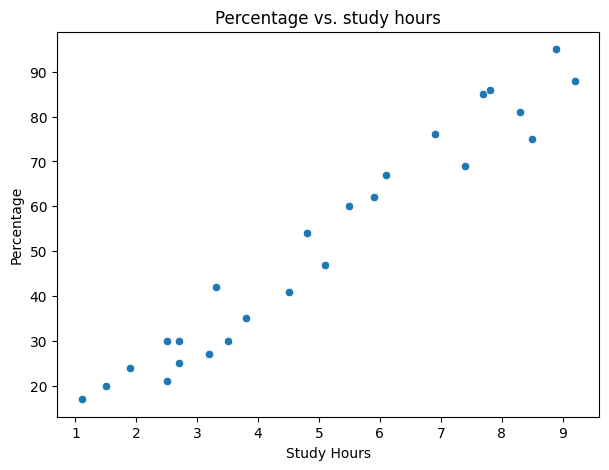

In [ ]:
plt.figure(figsize = (7,5))
sns.scatterplot(y = data['Scores'], x = data['Hours'])
plt.title('Percentage vs. study hours')
plt.ylabel('Percentage')
plt.xlabel('Study Hours')
plt.show()

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


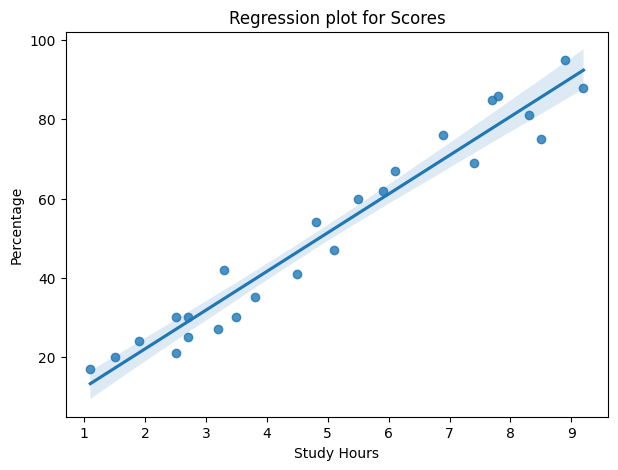

In [ ]:
# Here, we can see that there is a correlation between percentage and study hours
plt.figure(figsize = (7,5))
sns.regplot(x = data['Hours'], y = data['Scores'])
plt.title('Regression plot for Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
print(data.corr())
plt.show()

### **Model Training**

In [ ]:
# Separating Features and Labels
# Features
X = data.iloc[:, :-1].values
# Labels
Y = data.iloc[:, 1].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(25, 1) (20, 1) (5, 1)


In [ ]:
# Fitting the data into the model
linear = LinearRegression()
linear.fit(X_train, Y_train)
print('The model is trained successfully')

The model is trained successfully


In [ ]:
# Plotting the regression line
line = linear.coef_*X + linear.intercept_

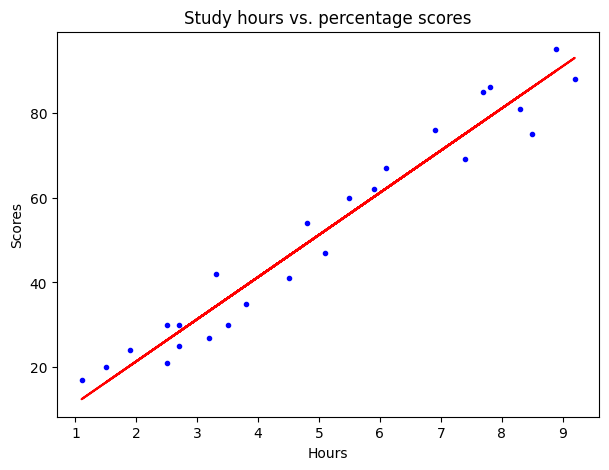

In [ ]:
plt.figure(figsize = (7, 5))
plt.scatter(X, Y, marker = '.', color = 'b')
plt.plot(X, line, color = 'r')
plt.title("Study hours vs. percentage scores")
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.show()

In [ ]:
# Accuracy on training data
training_data_accuracy = linear.score(X_train,Y_train)*100
print("Training Data Accuracy: ", training_data_accuracy)

Training Data Accuracy:  94.23348138802984


In [ ]:
# Accuracy on test data
test_data_accuracy = linear.score(X_test, Y_test)*100
print("Test Data Accuracy: ", test_data_accuracy)

Test Data Accuracy:  97.35538080811827


### **Predict Model**

In [ ]:
# Prediction of the percentage
pred = linear.predict(X_test)
Prediction = pd.DataFrame({'Study Hours': [i[0] for i in X_test], 'Predicted Marks': [j for j in pred]})
Prediction

,Study Hours,Predicted Marks
0,1.1,12.442587
1,2.5,26.359448
2,1.9,20.395079
3,9.2,92.961570
4,6.9,70.098155


In [ ]:
# Compare the predicted marks and actual marks in the dataset
compare = pd.DataFrame({'Actual Marks': Y_test, 'Predict Marks': pred})
compare

,Actual Marks,Predict Marks
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


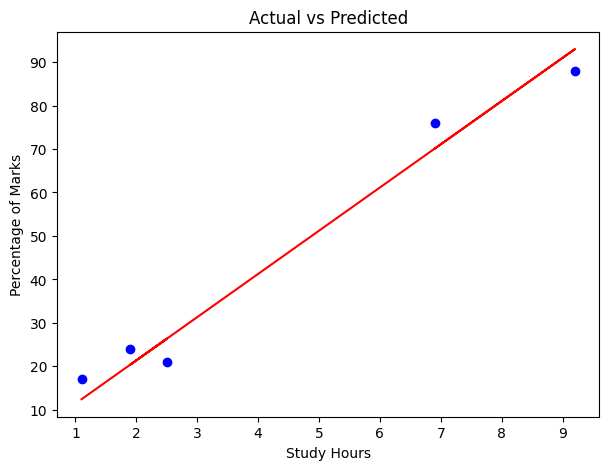

In [ ]:
# Predict marks and actual marks using data visulization
plt.figure(figsize = (7, 5))
plt.scatter(x = X_test, y = Y_test, color = 'Blue')
plt.plot(X_test, pred, color = 'Red')
plt.title('Actual vs Predicted')
plt.ylabel('Percentage of Marks')
plt.xlabel('Study Hours')
plt.show()

### **What will be the predicted score if a student studies for 9.25 hours per day?**

In [ ]:
predict_the_hrs_per_day = linear.predict([[9.25]])
print("Predicted marks for a student studying for 9.25 hours/day: {}".format(predict_the_hrs_per_day))

Predicted marks for a student studying for 9.25 hours/day: [93.45860056]


### **Model Evaluation**

In [ ]:
# Calculate the accuracy of the model
mean_sqr_err = metrics.mean_squared_error(Y_test, pred)
print("Mean_squared_error: ", mean_sqr_err)

Mean_squared_error:  24.387620339856596


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))

Mean Absolute Error: 4.877039354964476
